In [1]:
pwd

u'/disk0/Work/xike_hls_module/spkDect'

In [2]:
%pylab inline
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


In [3]:
import seaborn as sns
sns.set_context('poster')
sns.set_style('whitegrid')

### Generate Test File

In [2]:
t = arange(0,1,0.025)
shift = linspace(0,pi/3,8)
y = np.zeros((len(shift),len(t)))
for i, s in enumerate(shift):
    y[i,:] = np.sin(2*pi*2*t+s) + 0.08*randn(*t.shape)
for trace in y:
    noise_idx = np.where(trace>=0)[0]
    trace[noise_idx] = 0.08*randn(*noise_idx.shape)
y = y.T

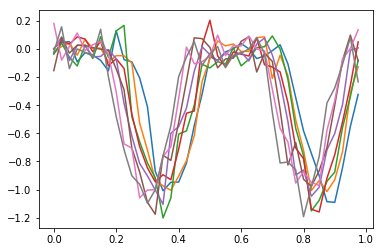

In [3]:
plot(t,y);

In [4]:
y.shape

(40, 8)

In [5]:
y = y.astype('float32')

In [6]:
y.tofile('spkDect_test.bin')

### Load test file

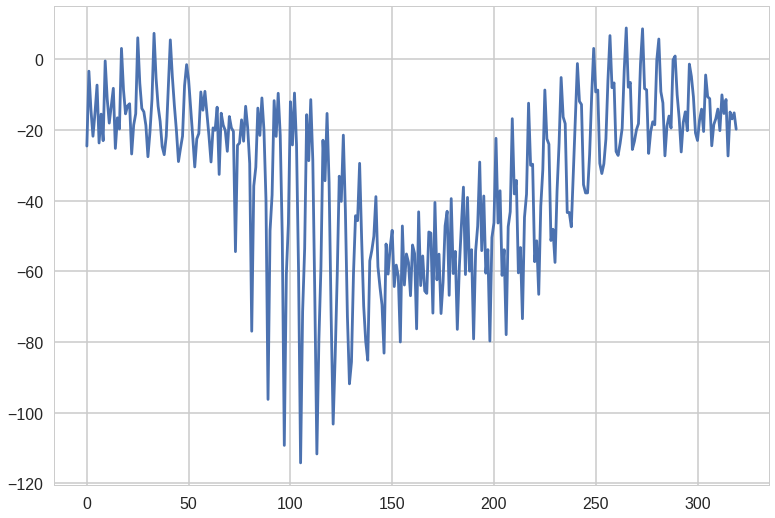

In [4]:
din  = np.fromfile('spkDect_test_spk.bin', dtype='float32')
plot(din)

In [5]:
din.dtype

dtype('float32')

In [6]:
data = np.zeros((40,8))
k = 0
for t in range(40):
    for ch in range(8):
        data[t,ch] = din[k]
        k+=1

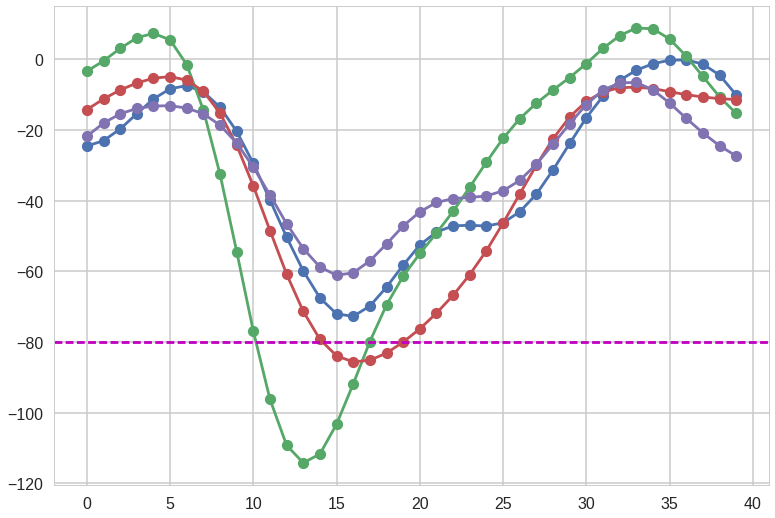

In [7]:
plot(data[:,:4], '-o');
axhline(-80,c='m',ls='--')

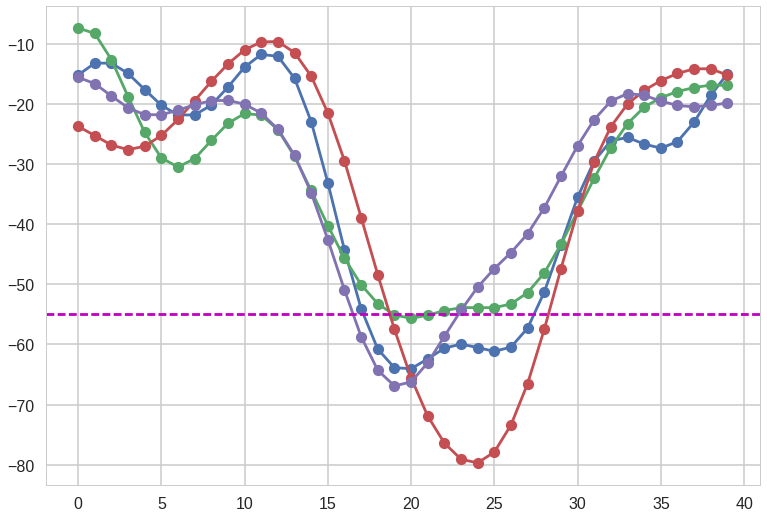

In [8]:
plot(data[:,4:], '-o');
axhline(-55,c='m',ls='--')

### Costomize data

In [9]:
data[:,6] = np.roll(data[:,6], -2)

In [10]:
data = data.reshape(1,-1).astype('float32')

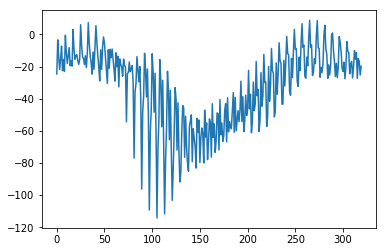

In [88]:
plot(data.T)

In [84]:
data.tofile('spkDect_test.bin')

In [89]:
d = np.fromfile('spkDect_test.bin', dtype=np.float32)

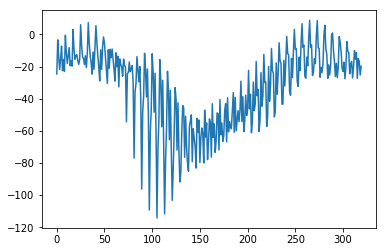

In [90]:
plot(d)

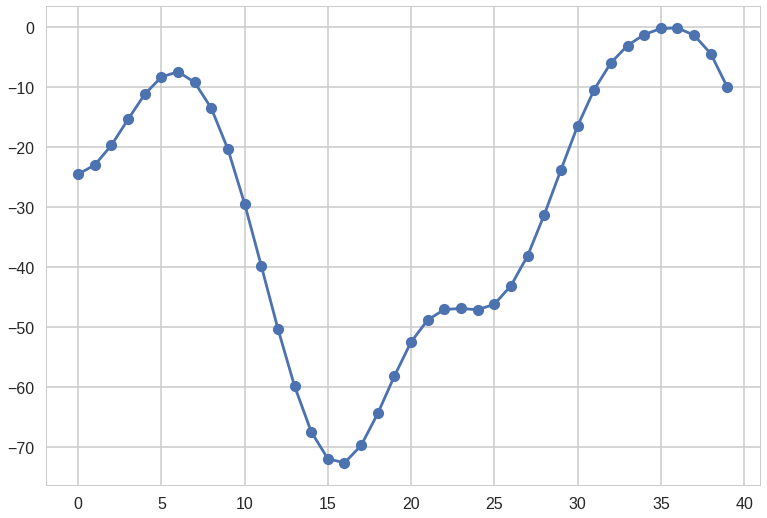

In [9]:
plot(data[:,0],'-o')

In [10]:
!rm spkDect_test_compare.bin

In [14]:
!vivado_hls /disk0/Work/xike_hls_module/hls_proj/spk_dect/solution1/script.tcl

  Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC
  Version 2016.1
  Build 1538259 on Fri Apr 08 16:12:49 MDT 2016
  Copyright (C) 1986-2016 Xilinx, Inc. All Rights Reserved.
INFO: [HLS 200-10] Running '/disk0/Xilinx/Vivado_HLS/2016.1/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'localuser' on host 'laic-ws1.hhmi.org' (Linux_x86_64 version 4.4.0-59-generic) on Mon Jul 17 22:48:41 EDT 2017
INFO: [HLS 200-10] On os Ubuntu 16.04.2 LTS
INFO: [HLS 200-10] In directory '/disk0/Work/xike_hls_module/spkDect'
INFO: [HLS 200-10] Opening project '/disk0/Work/xike_hls_module/spkDect/spk_dect'.
INFO: [HLS 200-10] Adding design file '../spkDect/spkDect.cpp' to the project
INFO: [HLS 200-10] Adding design file '../spkDect/spkDect.h' to the project
INFO: [HLS 200-10] Adding test bench file '../spkDect/spkDect_test.cpp' to the project
INFO: [HLS 200-10] Opening solution '/disk0/Work/xike_hls_module/spkDect/spk_dect/solution1'.
INFO: [SYN 201-201] Setting up clock 'default

In [40]:
thr_d = -50.
thr_u = thr_d
fig,ax=plt.subplots(1,1)
# ax.hold=True
# ax.set_xticks(np.arange(0,40,1))
ax.grid(True)

@interact(i=(0,7,1))
def csim_spkDect(i=4):
    din_compare  = np.fromfile('spkDect_test_compare.bin', dtype='int32')
    x = din_compare.reshape(40,8)[:,i]
    ax.plot(x/float(2**13),'-o', alpha=0.5);
    pivital_pos = np.where(x%2==1)[0]

    print pivital_pos
    if len(pivital_pos)>0:
        for p in pivital_pos:
            ax.axvline(p, c='g', ls='-.')
    ax.plot(data.reshape(40,8)[:,i],'-o')
    ax.axhline(thr_d ,c='m', ls='-.')
    ax.axhline(thr_u ,c='g', ls='-.') 

[19]


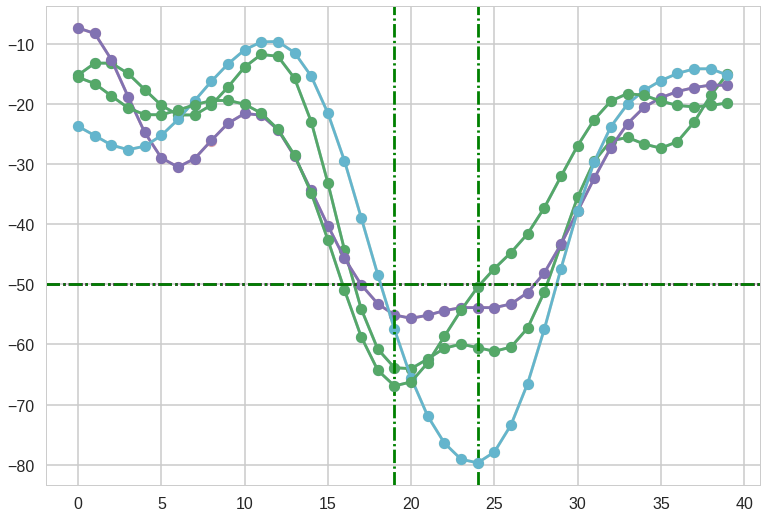

In [41]:
fig